In [3]:
import seaborn as sns  
import pandas as pd
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.shape

(891, 15)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
df = titanic.dropna()

In [15]:
df.isna().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck           False
embark_town    False
alive          False
alone          False
dtype: bool

In [18]:
df.duplicated().sum()

np.int64(1)

In [23]:
df = df.drop_duplicates()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


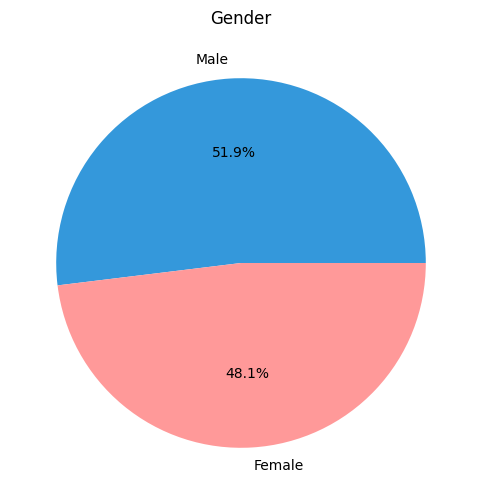

In [45]:
labels = ['Male', 'Female']
colors = ['#3498db', '#ff9999']
plt.figure(figsize=(6, 6))
plt.pie(sex_count, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Gender")
plt.show()

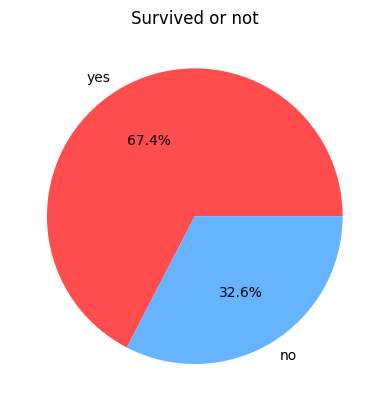

In [46]:
label = ['yes','no']
alive_count = df['survived'].value_counts()
plt.pie(alive_count,labels = label,autopct='%1.1f%%',colors = ['#ff4d4d', '#66b3ff'])
plt.title('Survived or not')
plt.show()

<Axes: xlabel='deck'>

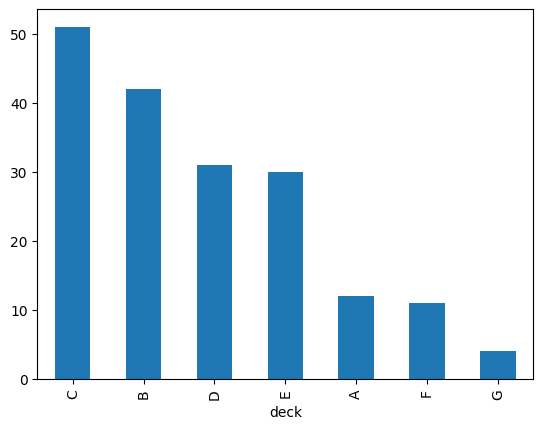

In [31]:
df['deck'].value_counts().plot(kind = 'bar')

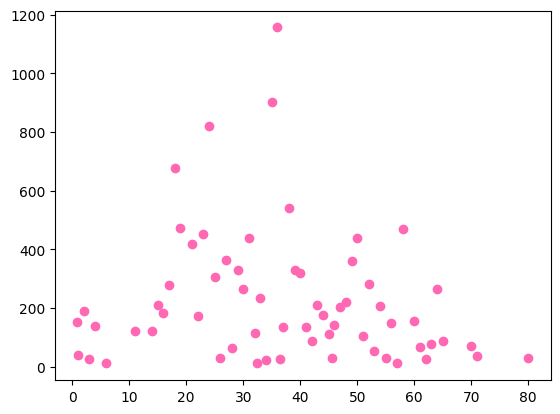

In [52]:
grouped_age = df.groupby('age')['fare'].sum()
plt.scatter(grouped_age.index,grouped_age.values,color = 'hotpink')
plt.show()

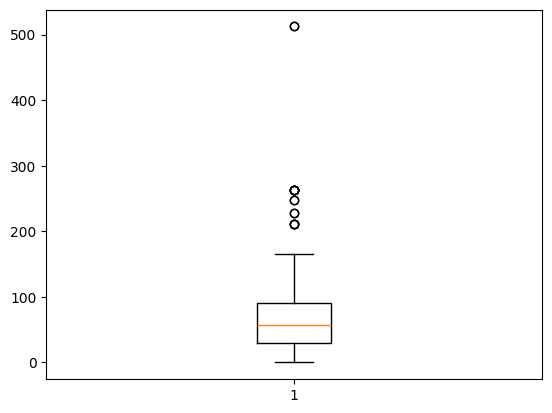

In [34]:
plt.boxplot(df['fare'])
plt.show()

<Axes: xlabel='embark_town'>

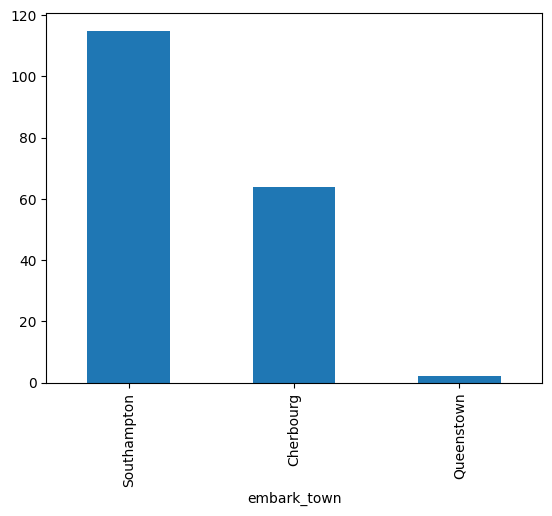

In [36]:
embark_town = df['embark_town'].value_counts()
embark_town.plot(kind = 'bar')

([<matplotlib.patches.Wedge at 0x266015e8d90>,
 [Text(-0.998056411994315, 0.46247529499102374, 'First'),
  Text(0.9031917353090201, -0.627889074016646, 'Second'),
  Text(1.0834722326000912, -0.18996821098429673, 'Third')],
 [Text(-0.5443944065423536, 0.2522592518132856, '86.2%'),
  Text(0.4926500374412836, -0.34248494946362507, '8.3%'),
  Text(0.5909848541455042, -0.10361902417325275, '5.5%')])

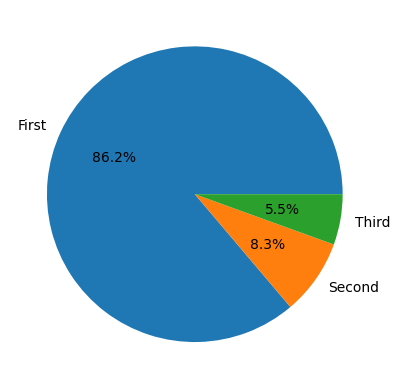

In [42]:
class_count = df['class'].value_counts()
plt.pie(class_count,labels = ['First','Second','Third'],autopct = '%1.1f%%')

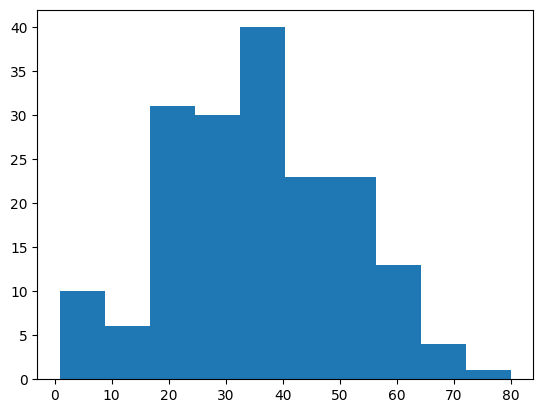

In [56]:
plt.hist(df['age'])
plt.show()